Plotting NetCDF snowmap data

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import colors

Open NetCDF file

In [2]:
ds = xr.open_dataset('Example_PM_SSUM_25km_month02.nc')

Plot each layer

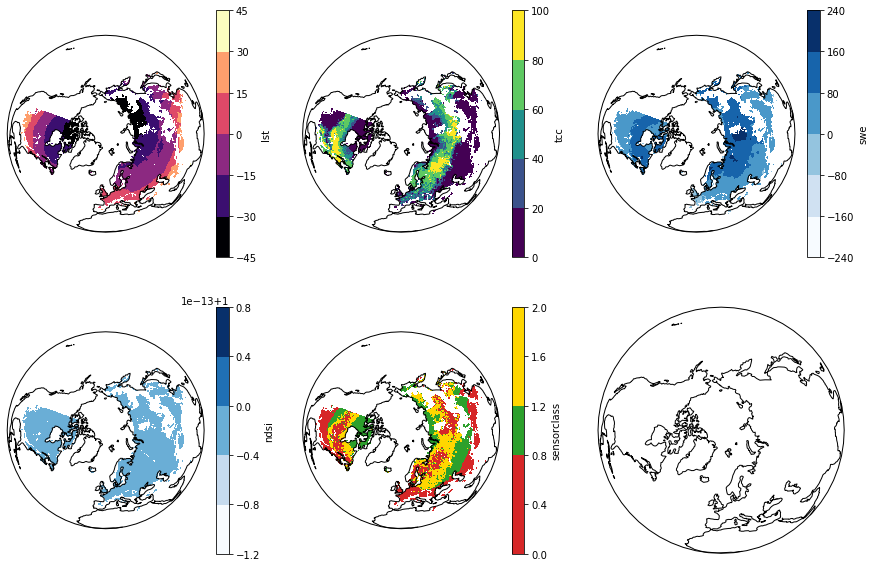

In [3]:
# define a custom color list for sensor classificaitons
CustomCmap = colors.ListedColormap(['tab:red', 'tab:green', 'gold'])

proj = ccrs.Orthographic(0, 90)
fig, ax = plt.subplots(2, 3, figsize=(15,10),subplot_kw=dict(projection=proj))
for a in ax.ravel():
    a.set_global();
    a.coastlines();

ds.lst.plot.contourf(ax=ax[0,0], transform=ccrs.PlateCarree(), cmap='magma');
ds.tcc.plot.contourf(ax=ax[0,1], transform=ccrs.PlateCarree(), cmap='viridis');
ds.swe.plot.contourf(ax=ax[0,2], transform=ccrs.PlateCarree(), cmap='Blues');
ds.ndsi.plot.contourf(ax=ax[1,0], transform=ccrs.PlateCarree(), cmap='Blues');
ds.sensorclass.plot.contourf(ax=ax[1,1], transform=ccrs.PlateCarree(), cmap=CustomCmap);


Plot sensor class layer only

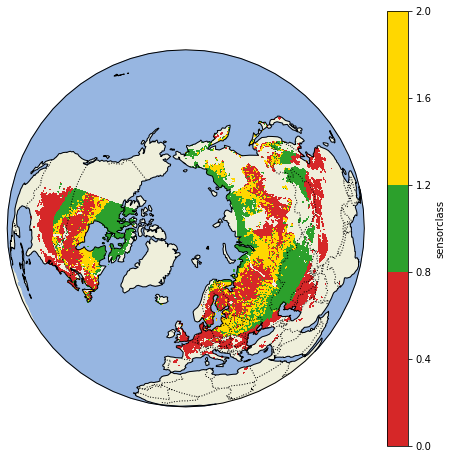

In [4]:
proj = ccrs.Orthographic(0, 90)
fig, ax = plt.subplots(figsize=(8,8),subplot_kw=dict(projection=proj))

ax.set_global();
ax.coastlines();
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')



ds.sensorclass.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap=CustomCmap);